<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/M2D/UT1/T2/M2D_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TAREA ALGORITMOS EVOLUTIVOS PROGRAMACIÓN EN IA
**EL PROBLEMA DEL VIAJANTE DE COMERCIO**

Crea un programa en Python que resuelva el problema para al menos 5 poblaciones (por ejemplo Telde, Gáldar, etc) usando el algoritmo evolutivo cuyas funciones de mutación y de recombinación vienen descritas en https://www.youtube.com/watch?v=3Kzj2FNaua8

**ENLACES DE INTERÉS:**

https://pythondiario.com/2018/05/el-problema-de-las-n-reinas-algoritmos.html

https://jarroba.com/algoritmos-geneticos-ejemplo

https://es.wikipedia.org/wiki/Problema_del_viajante

**RÚBRICA:**



*   (4 Puntos) El algoritmo muestra soluciones aceptables (para ello usa distancias reales en la matriz de distancias)
*   (4 Puntos) Se crean y comentan los métodos de mutación, fitness, y recombinanción.
*   (2 Puntos) Uso del vocabulario correcto (población, generación etc) así como explicación de los hiperparámetos (probabilidad de recombinación, de mutación, población inicial etc).

Se subirá un archivo PDF con el notebook de Jupiter incluyendo la ejecución y los markdown con las explicaciones.

In [ ]:
import pandas as pd
import numpy as np
import random
from tabulate import tabulate

# Carga y limpieza de los datos del fichero csv.
df = pd.read_csv("data_municipios.csv", index_col=0)
df[df.isna()] = 0
display(df)

,Las Palmas,Telde,Arucas,Galdar,Teror,Agaete,Mogan
Distancia(km),,,,,,,
Las Palmas,0.0,15.0,9.0,22.0,13.0,26.0,39.0
Telde,15.0,0.0,17.0,28.0,15.0,30.0,33.0
Arucas,9.0,17.0,0.0,13.0,7.0,18.0,33.0
Galdar,22.0,28.0,13.0,0.0,14.0,7.0,30.0
Teror,13.0,15.0,7.0,14.0,0.0,16.0,26.0
Agaete,26.0,30.0,18.0,7.0,16.0,0.0,24.0
Mogan,39.0,33.0,33.0,30.0,26.0,24.0,0.0


# Funciones

### Función de ajuste

Cálcula la suma de las distancias usando cada par de valores consecutivos del inviduo como índices de fila y columna del dataframe de distancias. Ej: [2,0,1] -> Distancia de 2 a 0 + Distancia de 0 a 1

In [ ]:
# Función de ajuste para evaluar la distancia total como la suma de las distancias entre ciudades.
def fitness(member, data_matrix):

  sum = 0
  for i in range(len(member)-1):
    idx_row = member[i]
    idx_col  = member[i+1]
    sum += data_matrix.iloc[idx_row][idx_col]
  return sum

   



### Función de Mutación

Crea un nuevo individuo a partir de otro intercambiando dos de sus valores entre sí.

Se define además una función que crea n individios a partir del mejore individio de la anterior generación, usando la función de mutación.

In [ ]:
# Función de mutación que intercambia dos valores de un individuo para crear otro individuo distinto.
def mutate(member):

  # Obtiene dos índices aleatorios dentro del rango de de longitud del array que representa el individuo.
  mutated_member = np.copy(member)
  mutated_index_1 = random.randint(0, len(member)-1)
  mutated_index_2 = random.randint(0, len(member)-1)
  while mutated_index_2 == mutated_index_1:
    mutated_index_2 = random.randint(0, len(member)-1)

  # Intecambio los valores de los índices obtenidos entre sí.
  mutated_member[[mutated_index_1, mutated_index_2]] = mutated_member[[mutated_index_2, mutated_index_1]]
  return mutated_member


# Función que genera n individuos con la funcion mutate para la siguiente generación a partir de un individuo.
def mutate_generation(member, n):

  #Si n es 0 se genera un array vacío con la dimensión que tendría un individuo
  if not n:
    return np.array([], dtype=np.int64).reshape(0,len(member))

  mutated_members = []
  mutated_members.append(mutate(member))

  while len(mutated_members) < n:
    mutated_member = mutate(member)
    # Comprueba si el individuo creado por mutación no se repite.
    # Nota: Es una comprobación opcional, no necesaria.
    if not (mutated_member == mutated_members).all(axis=1).any():
      mutated_members.append(mutated_member)
  return np.array(mutated_members)

### Función de Recombinación

Crea un nuevo individuo a partir de otros dos usando los valores del primero como índices de los valores del segundo.

Se define además una función que crea nuevos individios a partir de los mejores individuos de la anterior generación, usando la función de recombinación, a raíz de dos individuos por cada par posible entre los seleccionados. El total de invidiuos generados será igual al doble de la función tirangular para el tamaño del array de indiviudos introducidos.

In [ ]:
# Función de recombinación que combina dos miembros para generar un nuevo individuo.
def recombinate(member1, member2):

  recombinated_member = np.copy(member1)
  # Reordena los valores del primer miembro usando como índices los valores del segundo miembro.
  for idx, v in enumerate(recombinated_member):
    recombinated_member[idx] = member2[member1[idx]]

  return recombinated_member


# Función que genera dos individuos para cada combinación de dos de los individuos del array de entrada.
def recombinate_members(members, n):
  recombinated_members = []

  #Si n es 0 se genera un array vacío con la dimensión que tendría un individuo
  if not n:
    return np.array([], dtype=np.int64).reshape(0,len(members[0]))

  for member1 in members:
    for member2 in members:
      # Se omite la recombinación de un miembro consigo mismo (hermafrodismo) por la definición del algoritmo.
      # Nota: Se podrían calcular también estos individuos y obtener un número de individuos igual al cuadrado de los miembros seleccionados.
      if not (member1 == member2).all():
         recombinated_members.append(recombinate(member1, member2))
  # Se devuelve el número de individuos especificado por parámetro.
  return np.array(recombinated_members[:n])

### Función de Selección

Selecciona los n mejores individos indicados por parámetro reordenando el array
de individios en función de la función de ajuste.

In [ ]:
# Función que selecciona los n mejores individos indicados por parámetro reordenando el array de individios en función de la función de ajuste.
def selection(population, n, dataframe):

  if not n:
    return np.array([], dtype=np.int64).reshape(0,len(population[0]))

  population = np.array(sorted(population, key= lambda member: fitness(member, dataframe)))
  return population[:n]

### Función de Generación Aleatoria de individuos

Función que genera n miembros de forma aleatorio permutando los índices.

Se incluye una función para crear la población inicial

In [ ]:
# Funcion que genera n individuos aleatorios
def generate_random_members(n, size):

  #Si n es 0 se genera un array vacío con la dimensión que tendría un individuo
  if not n:
    return np.array([], dtype=np.int64).reshape(0,size)

  indexes = range(0,size)
  # Genera N arrays aleatorios permutando los índices. Ex: [4 0 5 2 6 1 3]
  population = np.array([np.random.permutation(indexes)])
  while len(population) < n:
    member = np.random.permutation(indexes)
    # Comprueba si el individuo creado por la permutación no se repite.
    # Nota: Es una comprobación opcional, no necesaria.
    if not (member == population).all(axis=1).any():
      population = np.append(population, [member], axis=0)
  return population


# Funcion que genera una población inicial usando la función de generación de miembros aleatorios
def generate_first_generation(population_size, member_size):
  return generate_random_members(population_size, member_size)


### Funciones auxiliares de visualización

Estos métodos ayudan a visualizar en distintas tablas con la información relevante para poder analizar los individuos generados y seleccionados en cada generación.

In [ ]:
# Función que muestra en forma tabular la poblacion numerada y ordenada con la información relevante
def visualize_population(members, dataframe, types, type_sizes):
  data = []

  # Creación de máscara para la visualización
  #types = ['Recombinación', 'Mutación', 'Selección', 'Aleatorio']
  types_mask = []
  for idx, size in enumerate(type_sizes):
    for j in range(size):
      types_mask.append(types[idx])

  # Añade la fila de cada individuo con su información relevante
  for idx, member in enumerate(members):
    data.append([types_mask[idx], #tipo de individuo
                 member, # array del individuo
                 fitness(member, dataframe), # distancia obtenida de la función de ajuste
                 [dataframe.iloc[member[i]][member[i+1]] for i in range(len(member)-1)], # distancias parciales obtenidas del dataframe
                 " - ".join([dataframe.index[i] for i in member])]) # nombres de municipios recorridos

  # Ordena las filas por la función de ajuste (columna 3) y añade una columna de indice
  data = sorted(data, key= lambda member: member[2])
  indexed_data = []
  for idx, row in enumerate(data):
    indexed_row = [idx+1]
    for column in row:
      indexed_row.append(column)
    indexed_data.append(indexed_row)

  # se presenta la información tabulada indicando las cabeceras de cada columna
  print ("\n",tabulate(indexed_data, headers=["", "Tipo", "Individuo", "Distancia(Km)", "Parciales(Km)", "Ruta"]),"\n")
  return


# Función que muestra en forma tabular los individuos de un array enumerados y con información relevante
def visualize_type(members, dataframe, order_members):
  data = []

  # Ordena las filas por la función de ajuste si el flag es True
  if order_members:
    members = np.array(sorted(members, key= lambda member: fitness(member, dataframe)))

  # Añade la fila de cada individuo con su información relevante y un índice
  for idx, member in enumerate(members):
    data.append([idx+1, #indice
                 member, # array del individuo
                 fitness(member, dataframe), # distancia obtenida de la función de ajuste
                 [dataframe.iloc[member[i]][member[i+1]] for i in range(len(member)-1)], # distancias parciales obtenidas del dataframe
                 " - ".join([dataframe.index[i] for i in member])]) # nombres de municipios recorridos

  # se presenta la información tabulada indicando las cabeceras de cada columna
  print ("\n",tabulate(data, headers=["", "Individuo", "Distancia(Km)", "Parciales(Km)", "Ruta"]),"\n")
  return


# Función que muestra la información de una generación y gestiona las tablas a visualizar en función de la máscara
def visualize_generation(population, dataframe, generation, types, type_sizes, type_members, mask, order_members):

  print("\n*********************\n*** Generación {:2} ***\n*********************\n".format(generation))
  # Mask y type_members contienen el flag indicando si un tipo debe visualizarse y los individuos de dicho tipo
  if mask[0]:
    print("Mejores individuos\n******************")
    visualize_type(type_members[0], dataframe, order_members)
  if mask[1]:
    print("Recombinaciones\n**********")
    visualize_type(type_members[1], dataframe, order_members)
  if mask[2]:
    print("Mutaciones\n***************")
    visualize_type(type_members[2], dataframe, order_members)
  if mask[3]:
    print("Seleccionados\n*************")
    visualize_type(type_members[3], dataframe, order_members)
  if mask[4]:
    print("Aleatorios\n**********")
    visualize_type(type_members[4], dataframe, order_members)
  # La población completa se representa siempre
  print("Poblacion\n*********")
  visualize_population(population, dataframe, types, type_sizes)

# Hiperparámetros y cálculo de variables

In [ ]:
###################
# Hiperparámetros #
###################

number_of_generations = 10 # Número de poblaciones que se van a generar
population_size = 10 # Número de individuos de cada población

prob_recombination = 0.3 # Probabilidad de recombinación o porcentaje de individuos generados por este método
prob_mutation = 0.4 # Probabilidad de mutación o porcentaje de individuos generados por este método
perc_selection_members = 0.2 # Porcentaje de individuos seleccionados de la anterior generación

###################
# Otras variables #
###################

# Máscara para indicar que subconjuntos de individuos mostrar y flag para ordenarlas
visualize_mask = [True, True, True, True, True] # [Mejores individuos, Recombinaciones, Mutaciones, Selección, Aleatorios]
order_masked_tables = True # Ordena los individuos por la función de ajuste si True en las tablas parciales

n_chromosomes = len(df.index) # Tamaño del array del individio

# Ajuste de probabilidades. Si los valores se exceden se escalan según pesos.
total_perc = prob_recombination + prob_mutation + perc_selection_members
if total_perc > 1:
  prob_recombination /= total_perc
  prob_mutation /= total_perc
  perc_selection_members /= total_perc

# Cálculo de los cantidad de inviduos que se generarán de cada tipo. Si no alcanzan la población se añaden individuos aleatorios.
size_mutation_members = round(population_size*prob_mutation)
size_recombination_members = round(population_size * prob_recombination)
size_selection_members = round(population_size * perc_selection_members)
size_random_members = population_size - size_mutation_members - size_recombination_members - size_selection_members

# Cálculo de los indiviudos necesarios para realizar las recombinaciones
size_members_to_recombine = 2
while size_recombination_members > 2*sum(range(1,size_members_to_recombine)): #Coincide con el doble de la función triangular
  size_members_to_recombine+=1
size_members_to_recombine = max(size_members_to_recombine, size_selection_members)

# Creación de máscaras para la visualización
sizes = [size_mutation_members, size_recombination_members, size_selection_members, size_random_members]
types = ['Mutación', 'Recombinación', 'Selección', 'Aleatorio']

#Información obtenido de los parámetros relevantes
print("Generaciones:", number_of_generations)
print("Población:", population_size)
print("\nMutaciones:", size_mutation_members)
print("Recombinaciones:", size_recombination_members)
print("Selección:", size_selection_members)
print("Aleatorio:", size_random_members)

Generaciones: 10
Población: 10

Mutaciones: 4
Recombinaciones: 3
Selección: 2
Aleatorio: 1


# Ejecución del algoritmo

In [ ]:
# Creación de la primera población
generation = 1
population = generate_first_generation(population_size, n_chromosomes)

#Visualización de la primera población
print("\n*************************\n*** Población Inicial ***\n*************************\n".format(generation))
visualize_type(population, df, True)

# Bucle para crear nuevas generaciones
while generation < number_of_generations:

  generation += 1

  # Selección de los mejores miembros para generar nuevos individuos
  selected_members = selection(population, size_members_to_recombine, df)

  # Se generan individuos por recombinación
  recombinated_members = recombinate_members(selected_members, size_recombination_members)

  # Se generan individuos por mutación
  mutated_members = mutate_generation(selected_members[0], size_mutation_members)

  # Individuos guardados o "clonados" para la próxima generación
  cloned_members = selected_members[:size_selection_members]

  # Se generan individuos aleatoriamente
  random_members = generate_random_members(size_random_members, n_chromosomes)

  # Formación de la siguiente población
  population = np.concatenate((recombinated_members, mutated_members, cloned_members, random_members),axis=0)

  # Visualización de resultados de la generación
  type_members = [selected_members, recombinated_members, mutated_members, cloned_members, random_members]
  visualize_generation(population, df, generation, types, sizes, type_members, visualize_mask, order_masked_tables)

# Visualización del mejor resultado encontrado
print("\n***********************\n*** Mejor individuo ***\n***********************")
visualize_type([selected_members[0]],df, False)


*************************
*** Población Inicial ***
*************************


     Individuo          Distancia(Km)  Parciales(Km)                         Ruta
--  ---------------  ---------------  ------------------------------------  -------------------------------------------------------------
 1  [4 5 3 0 2 1 6]              104  [16.0, 7.0, 22.0, 9.0, 17.0, 33.0]    Teror - Agaete - Galdar - Las Palmas - Arucas - Telde - Mogan
 2  [2 4 0 3 5 6 1]              106  [7.0, 13.0, 22.0, 7.0, 24.0, 33.0]    Arucas - Teror - Las Palmas - Galdar - Agaete - Mogan - Telde
 3  [3 5 1 2 4 0 6]              113  [7.0, 30.0, 17.0, 7.0, 13.0, 39.0]    Galdar - Agaete - Telde - Arucas - Teror - Las Palmas - Mogan
 4  [6 2 5 4 1 0 3]              119  [33.0, 18.0, 16.0, 15.0, 15.0, 22.0]  Mogan - Arucas - Agaete - Teror - Telde - Las Palmas - Galdar
 5  [5 4 1 3 2 0 6]              120  [16.0, 15.0, 28.0, 13.0, 9.0, 39.0]   Agaete - Teror - Telde - Galdar - Arucas - Las Palmas - Mogan
 6  [5 2 

### Explicación de las tablas generadas

En primer lugar se muestra la población inicial generado aleatoriamente mediante permutaciones.

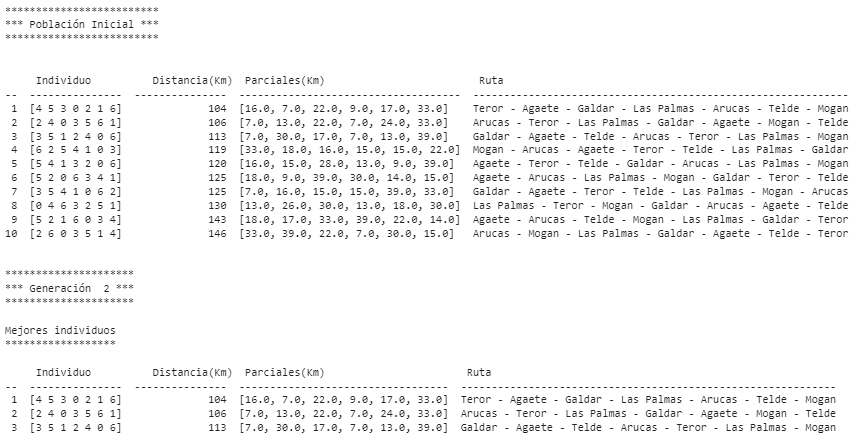

En cada generación se muestran en primer lugar los indiviudos escogidos de la generación anterior, tanto los seleccionados para conservarse como parte de la nueva generación como los que son necesarios para obtener suficientes individuos de recombinación.

 A continuación se muetsran los indiviudos que forman la población de la nueva generación separados por el método por el que se han obtenido.

 * Recombinaciones de los mejores individuos anteriores
 * Mutaciones desde el mejor indiviudo anterior
 * Seleccionados de la anterior generación
 * Individuos espontáneas genrados aleatoriamente


 Nota: Estas tablas se pueden omitir individualmente ajustando a False sus flags en la máscara creada para tal efecto.

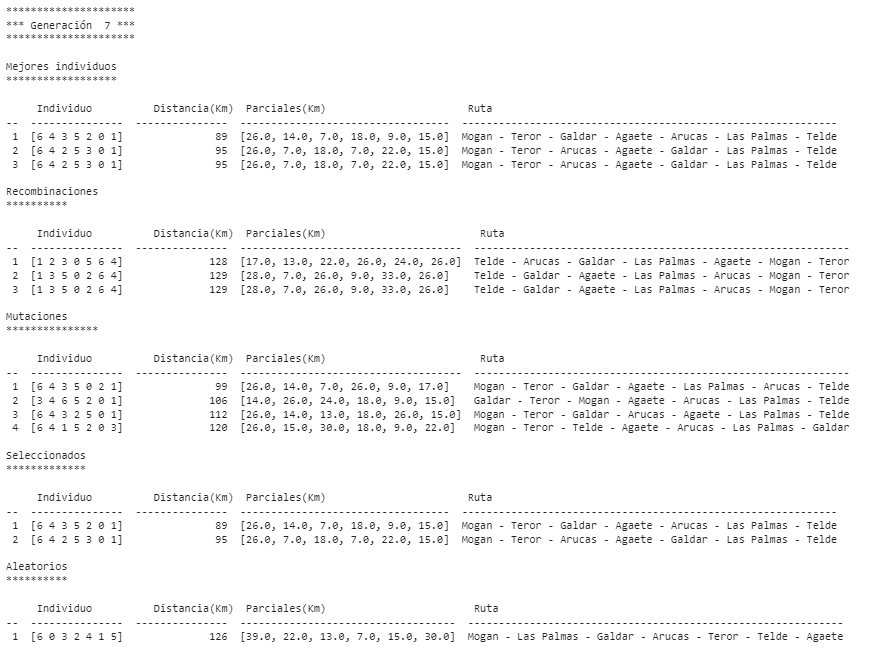

Finalmente se muestra una tabla con todos los individuos ordenados y añadiendo una columna con el método por el que se generaron para facilitar su estudio.

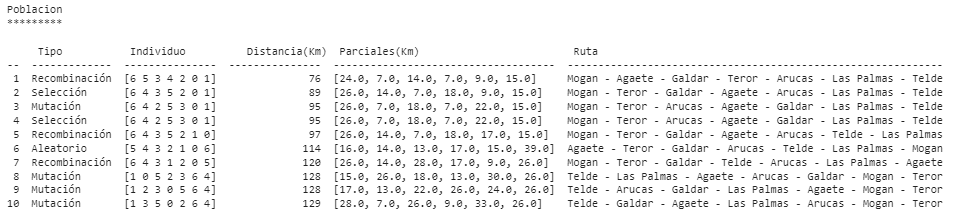

Tras la útlima generación se muestra el mejor resultado obtenido con la ejecución del algoritmo.

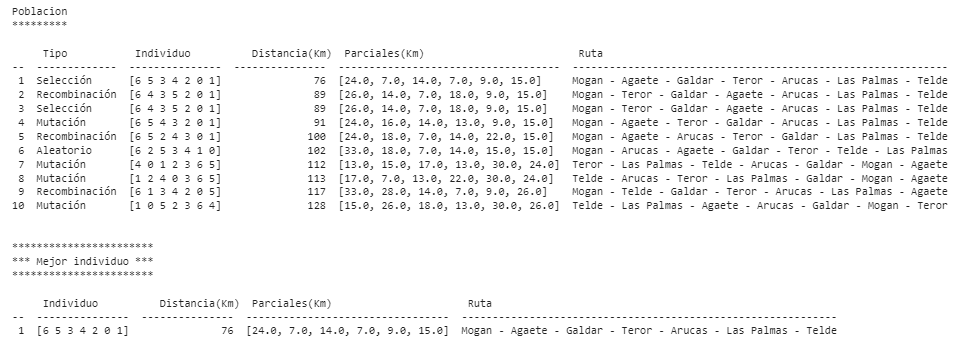

### Extra

Solución generado para los 21 municipios de Gran Canaria con

30 generaciones y población de 30 individuos.

*   Generaciones: 30
*   Poblabcio: 30
*   Probabilidad Recombinación: 0.3
*   Probabilidad de Mutación: 0.4
*   Probabilidad de Selección(Clonación): 0.2

Nota: Recordar que se han usado distancias reales según coordenadas y no distancias por carretera.

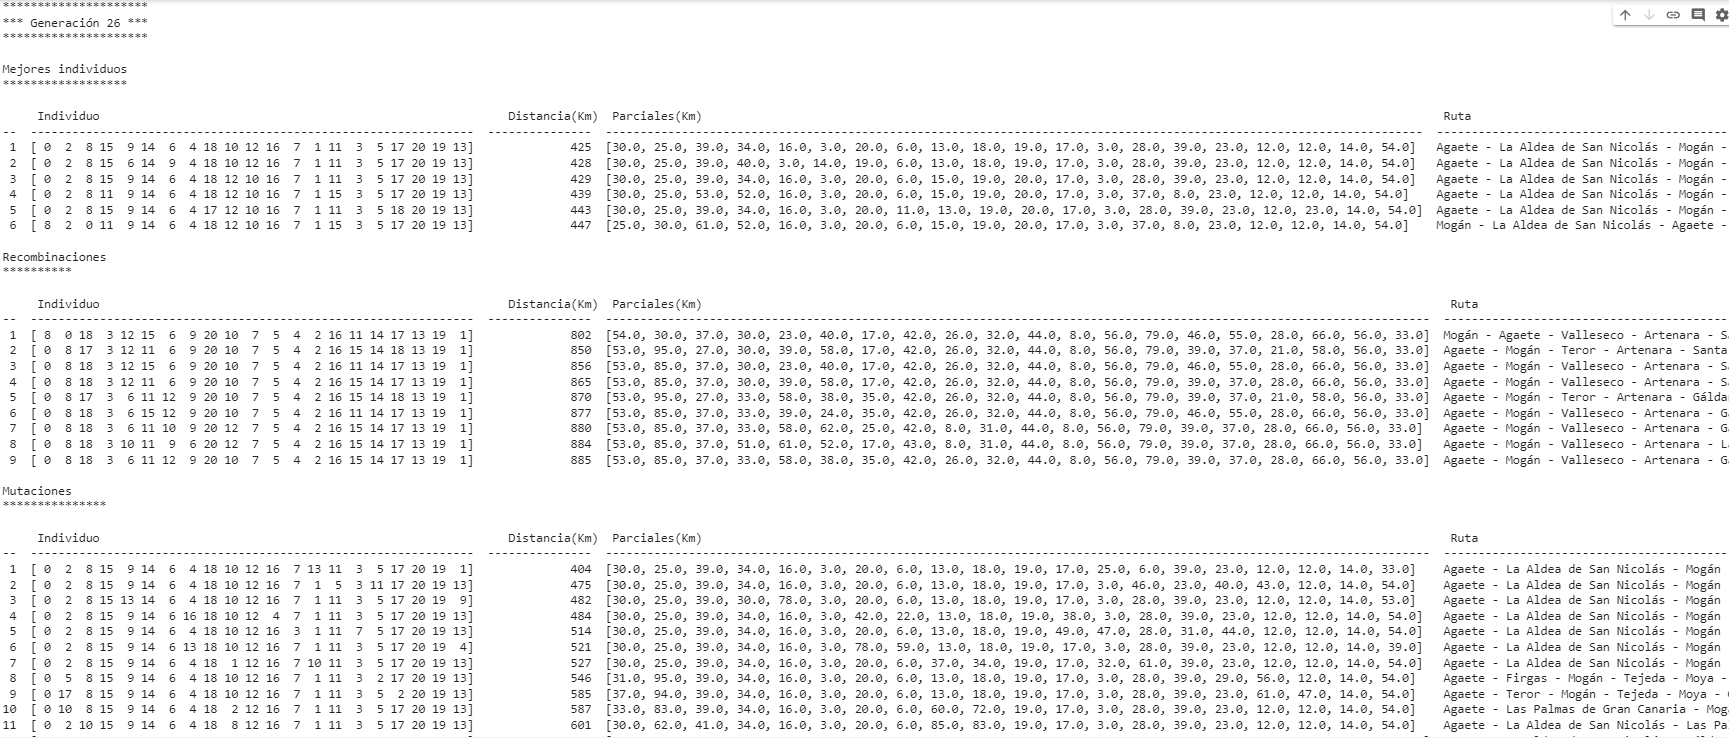

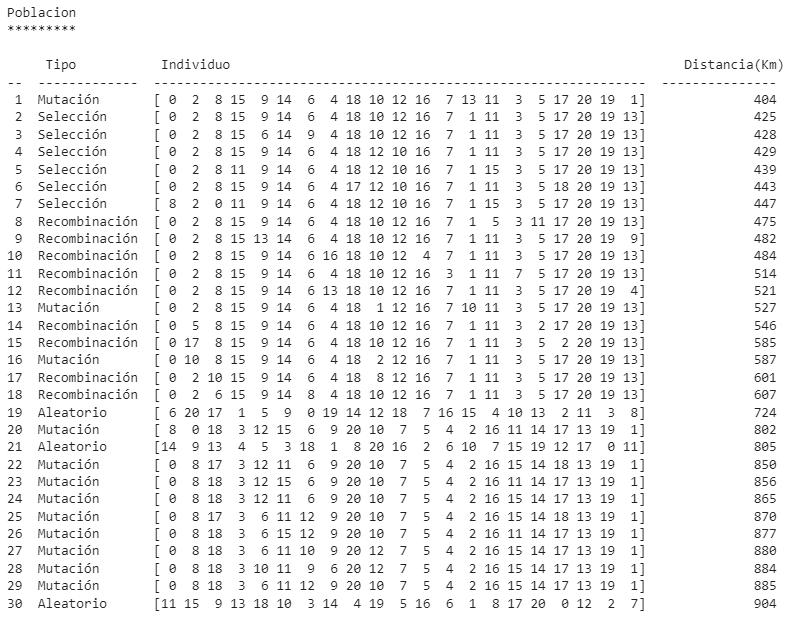

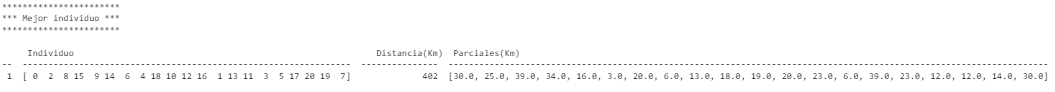

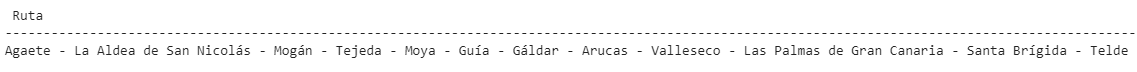
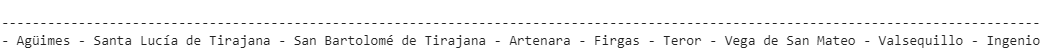